# ERA5

## Configuration

In [1]:
INPUT_FILE = 'csvs/database_era5.csv'
HOPT_ELM_EXP = 'era5_elm_1l_cv'
HOPT_SVM_EXP = 'era5_svm_cv'

In [2]:
from lib.helpers import *
from lib.plots import *
from IPython.display import set_matplotlib_formats
from IPython.core.display import clear_output

%matplotlib inline
%load_ext autoreload
%autoreload 2
set_matplotlib_formats('retina', 'png', 'pdf')

## Read data

In [3]:
import pandas as pd

df = pd.read_csv(INPUT_FILE, na_values=['#NAME?'])

In [4]:
len(df)

6358

In [5]:
df.head(5)

,timestamp,power,800_potential_vorticity,800_specific_rain_water_content,800_specific_snow_water_content,800_geopotential,800_temperature,800_specific_humidity,800_vertical_velocity,800_vorticity_(relative),...,instantaneous_surface_sensible_heat_flux,instantaneous_moisture_flux,skin_temperature,soil_temperature_level_4,temperature_of_snow_layer,forecast_albedo,forecast_surface_roughness,forecast_logarithm_of_surface_roughness_for_heat,100_metre_u_wind_component,100_metre_v_wind_component
0,1.199142e+09,5.062358,1.030059e-06,0.000000,0.000000,19881.312012,276.498428,0.001768,0.177553,0.000021,...,2.742894,1.471184e-06,271.605400,284.490997,273.118116,0.127404,0.327620,-6.455932,-0.493846,1.975267
1,1.199164e+09,15.854582,8.788981e-07,0.000000,0.000000,19702.475098,276.324902,0.001287,0.147644,0.000023,...,-8.456777,9.724127e-07,274.449509,284.463531,272.075150,0.127404,0.330838,-6.376909,-1.009596,1.292644
2,1.199185e+09,5.186692,7.864253e-07,0.000000,0.000000,19605.051758,275.381569,0.001015,0.102353,0.000028,...,-52.268616,-9.115076e-06,279.848511,284.436920,270.824219,0.127445,0.330481,-6.386376,-0.796404,2.400782
3,1.199207e+09,24.205508,6.412278e-07,0.000000,0.000000,19385.869141,274.225632,0.003413,0.232089,-0.000006,...,-0.214573,-6.679866e-07,277.102051,284.409332,273.160645,0.127445,0.328211,-6.441814,-2.339380,3.527163
4,1.199228e+09,27.907537,5.055861e-07,0.000043,0.000012,19109.912109,274.462891,0.005352,-1.136514,0.000118,...,10.244557,-2.524515e-06,278.108276,284.382568,273.160400,0.128137,0.360989,-5.764565,-4.049392,7.589182


### Date conversion

In [6]:
def to_datetime(row):
    row = pd.to_datetime(row, unit='s')
    row = row.dt.tz_localize('UTC').dt.tz_convert('Europe/Brussels')
    row = row.apply(lambda x: x.strftime('%d/%m/%Y %H:%M:%S'))
    
    return row

df['timestamp'] = to_datetime(df['timestamp'])

In [7]:
df.head(5)

,timestamp,power,800_potential_vorticity,800_specific_rain_water_content,800_specific_snow_water_content,800_geopotential,800_temperature,800_specific_humidity,800_vertical_velocity,800_vorticity_(relative),...,instantaneous_surface_sensible_heat_flux,instantaneous_moisture_flux,skin_temperature,soil_temperature_level_4,temperature_of_snow_layer,forecast_albedo,forecast_surface_roughness,forecast_logarithm_of_surface_roughness_for_heat,100_metre_u_wind_component,100_metre_v_wind_component
0,01/01/2008 00:00:00,5.062358,1.030059e-06,0.000000,0.000000,19881.312012,276.498428,0.001768,0.177553,0.000021,...,2.742894,1.471184e-06,271.605400,284.490997,273.118116,0.127404,0.327620,-6.455932,-0.493846,1.975267
1,01/01/2008 06:00:00,15.854582,8.788981e-07,0.000000,0.000000,19702.475098,276.324902,0.001287,0.147644,0.000023,...,-8.456777,9.724127e-07,274.449509,284.463531,272.075150,0.127404,0.330838,-6.376909,-1.009596,1.292644
2,01/01/2008 12:00:00,5.186692,7.864253e-07,0.000000,0.000000,19605.051758,275.381569,0.001015,0.102353,0.000028,...,-52.268616,-9.115076e-06,279.848511,284.436920,270.824219,0.127445,0.330481,-6.386376,-0.796404,2.400782
3,01/01/2008 18:00:00,24.205508,6.412278e-07,0.000000,0.000000,19385.869141,274.225632,0.003413,0.232089,-0.000006,...,-0.214573,-6.679866e-07,277.102051,284.409332,273.160645,0.127445,0.328211,-6.441814,-2.339380,3.527163
4,02/01/2008 00:00:00,27.907537,5.055861e-07,0.000043,0.000012,19109.912109,274.462891,0.005352,-1.136514,0.000118,...,10.244557,-2.524515e-06,278.108276,284.382568,273.160400,0.128137,0.360989,-5.764565,-4.049392,7.589182


## Data Distribution

### Distribution of features

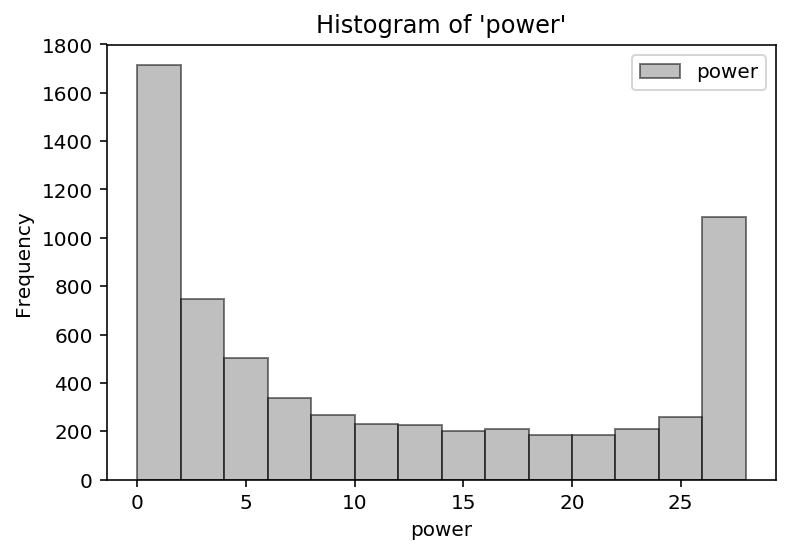

In [8]:
plot_histogram(df['power'])

## Data Preparation

In [9]:
y = df.power
X = df.drop(['timestamp', 'power'], 1)

In [10]:
y.head(5)

0     5.062358
1    15.854582
2     5.186692
3    24.205508
4    27.907537
Name: power, dtype: float64

In [11]:
X.head(5)

,800_potential_vorticity,800_specific_rain_water_content,800_specific_snow_water_content,800_geopotential,800_temperature,800_specific_humidity,800_vertical_velocity,800_vorticity_(relative),800_divergence,800_u_component_of_wind,...,instantaneous_surface_sensible_heat_flux,instantaneous_moisture_flux,skin_temperature,soil_temperature_level_4,temperature_of_snow_layer,forecast_albedo,forecast_surface_roughness,forecast_logarithm_of_surface_roughness_for_heat,100_metre_u_wind_component,100_metre_v_wind_component
0,1.030059e-06,0.000000,0.000000,19881.312012,276.498428,0.001768,0.177553,0.000021,0.000009,2.214015,...,2.742894,1.471184e-06,271.605400,284.490997,273.118116,0.127404,0.327620,-6.455932,-0.493846,1.975267
1,8.788981e-07,0.000000,0.000000,19702.475098,276.324902,0.001287,0.147644,0.000023,-0.000007,5.483051,...,-8.456777,9.724127e-07,274.449509,284.463531,272.075150,0.127404,0.330838,-6.376909,-1.009596,1.292644
2,7.864253e-07,0.000000,0.000000,19605.051758,275.381569,0.001015,0.102353,0.000028,-0.000001,7.007135,...,-52.268616,-9.115076e-06,279.848511,284.436920,270.824219,0.127445,0.330481,-6.386376,-0.796404,2.400782
3,6.412278e-07,0.000000,0.000000,19385.869141,274.225632,0.003413,0.232089,-0.000006,0.000028,8.641260,...,-0.214573,-6.679866e-07,277.102051,284.409332,273.160645,0.127445,0.328211,-6.441814,-2.339380,3.527163
4,5.055861e-07,0.000043,0.000012,19109.912109,274.462891,0.005352,-1.136514,0.000118,0.000046,12.993994,...,10.244557,-2.524515e-06,278.108276,284.382568,273.160400,0.128137,0.360989,-5.764565,-4.049392,7.589182


## Explore data

### Find outliers

In [12]:
outliers = [find_outliers_tukey(X[column]) for column in X]

pd.DataFrame(data=[[len(tukey_indices) for tukey_indices, tukey_values in outliers]], columns=X.columns)

,800_potential_vorticity,800_specific_rain_water_content,800_specific_snow_water_content,800_geopotential,800_temperature,800_specific_humidity,800_vertical_velocity,800_vorticity_(relative),800_divergence,800_u_component_of_wind,...,instantaneous_surface_sensible_heat_flux,instantaneous_moisture_flux,skin_temperature,soil_temperature_level_4,temperature_of_snow_layer,forecast_albedo,forecast_surface_roughness,forecast_logarithm_of_surface_roughness_for_heat,100_metre_u_wind_component,100_metre_v_wind_component
0,174,1399,1121,173,0,5,503,228,272,191,...,1039,527,214,0,1207,36,1133,1116,56,21


## Feature Engineering

### Remove constant features

In [13]:
columns_removed = get_constants(X)
columns_removed

Index(['angle_of_sub_gridscale_orography',
       'anisotropy_of_sub_gridscale_orography', 'geopotential',
       'high_vegetation_cover', 'ice_temperature_layer_4', 'lake_cover',
       'lake_depth', 'land_sea_mask', 'low_vegetation_cover', 'sea_ice_cover',
       'sea_surface_temperature', 'slope_of_sub_gridscale_orography',
       'soil_type', 'standard_deviation_of_filtered_subgrid_orography',
       'standard_deviation_of_orography', 'type_of_high_vegetation',
       'type_of_low_vegetation'],
      dtype='object')

In [14]:
X = X.drop(columns_removed, 1)

In [15]:
len(X.columns)

209

## Feature selection and model building

### Split processed data

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=False, random_state=0)

In [17]:
print('Train: {}'.format(X_train.shape))
print('Test: {}'.format(X_test.shape))

Train: (4768, 209)
Test: (1590, 209)


### Shuffle train data

In [18]:
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train, random_state=0)

### Feature selection

In [19]:
from sklearn.feature_selection import mutual_info_regression

feature_scores = get_feature_values(X, y)
pd.Series(feature_scores, index=X.columns).sort_values(ascending=False).head(20)

875_v_component_of_wind                             0.575461
850_v_component_of_wind                             0.508280
900_v_component_of_wind                             0.477503
825_v_component_of_wind                             0.404551
instantaneous_northward_turbulent_surface_stress    0.365320
800_v_component_of_wind                             0.323136
100_metre_v_wind_component                          0.305850
925_v_component_of_wind                             0.304839
875_vertical_velocity                               0.245899
900_vertical_velocity                               0.243752
10_metre_v_wind_component                           0.235731
vertical_integral_of_northward_water_vapour_flux    0.235607
neutral_wind_at_10_m_v_component                    0.222869
850_vertical_velocity                               0.219206
925_vertical_velocity                               0.215894
950_v_component_of_wind                             0.204475
825_vertical_velocity   

In [20]:
len(feature_scores)

209

## Parameter exploration

In [21]:
from datetime import datetime
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics.scorer import make_scorer

cv = ShuffleSplit(n_splits=6)
scoring = {
    'ev': make_scorer(explained_variance_score),
    'r2': make_scorer(r2_score),
    'rmse': make_scorer(rmse_score, greater_is_better=False),
}
models = {}

### Find hyperparameters

In [22]:
from hyperopt.mongoexp import MongoTrials

#### ELM

In [23]:
trials = MongoTrials('mongo://localhost:27017/hyperopt/jobs', exp_key=HOPT_ELM_EXP)

display(len(trials.results))
display(pd.DataFrame(trials.results).sort_values(by='loss').head(5))

1000

,loss,loss_ev,loss_r2,loss_variance,ridge__alpha,rl__alpha,rl__n_hidden,rl__rbf_width,selector__k,status,time
389,4.955040,0.769982,0.769853,0.042548,0.000005,0.332327,5416.0,1.183172,27.0,ok,68.352621
801,4.961459,0.769364,0.769249,0.042685,0.000001,0.421522,3772.0,3.058306,27.0,ok,26.379920
289,4.964880,0.768928,0.768782,0.055390,0.000001,0.977410,8292.0,63.788394,30.0,ok,137.812891
797,4.973091,0.768318,0.768144,0.045008,0.000001,0.338790,6019.0,1.767654,30.0,ok,54.115350
937,4.975121,0.768170,0.768079,0.033729,0.000005,0.206642,3541.0,2.456954,27.0,ok,25.961643


In [24]:
best = get_best_trial(trials.results)
display(pd.DataFrame([best]))
models['elm'] = build_elm(
    X, y, 
    selector__k=int(best['selector__k']),
    rl__n_hidden=int(best['rl__n_hidden']),
    rl__alpha=best['rl__alpha'],
    rl__rbf_width=best['rl__rbf_width'],
    ridge__alpha=best['ridge__alpha'],
)

,loss,loss_ev,loss_r2,loss_variance,ridge__alpha,rl__alpha,rl__n_hidden,rl__rbf_width,selector__k,status,time
937,4.975121,0.76817,0.768079,0.033729,0.000005,0.206642,3541.0,2.456954,27.0,ok,25.961643


#### SVM

In [25]:
trials = MongoTrials('mongo://localhost:27017/hyperopt/jobs', exp_key=HOPT_SVM_EXP)

display(len(trials.results))
display(pd.DataFrame(trials.results).sort_values(by='loss').head(5))

999

,loss,loss_ev,loss_r2,loss_variance,selector__k,status,svm__C,svm__epsilon,svm__gamma,time
797,4.856196,0.779535,0.779088,0.027680,83,ok,14.774547,0.985715,0.019346,15.164382
608,4.865201,0.778856,0.778199,0.033158,81,ok,21.679158,0.444480,0.015004,20.035514
405,4.865244,0.778843,0.778248,0.029248,82,ok,13.586378,0.554093,0.017878,16.705396
789,4.869594,0.778403,0.777883,0.027133,84,ok,16.386082,0.488098,0.019699,19.283910
591,4.869611,0.778426,0.777831,0.031099,77,ok,12.870291,0.473791,0.021431,16.835191


In [26]:
best = get_best_trial(trials.results)
display(pd.DataFrame([best]))
models['svm'] = build_svm(
    X, y,
    selector__k=int(best['selector__k']),
    svm__C=best['svm__C'],
    svm__epsilon=best['svm__epsilon'],
    svm__gamma=best['svm__gamma']
)

,loss,loss_ev,loss_r2,loss_variance,selector__k,status,svm__C,svm__epsilon,svm__gamma,time
797,4.856196,0.779535,0.779088,0.02768,83,ok,14.774547,0.985715,0.019346,15.164382


### Validation curve

In [27]:
from sklearn.model_selection import validation_curve

#### ELM

##### Number of features

In [28]:
param_range = pd.Series(np.linspace(5, len(feature_scores), num=16, dtype=int), name='# of features')

train_scores, test_scores = validation_curve(
    models['elm'], 
    X, 
    y, 
    param_name='selector__k', 
    param_range=param_range,
    cv=cv, 
    scoring='r2'
)

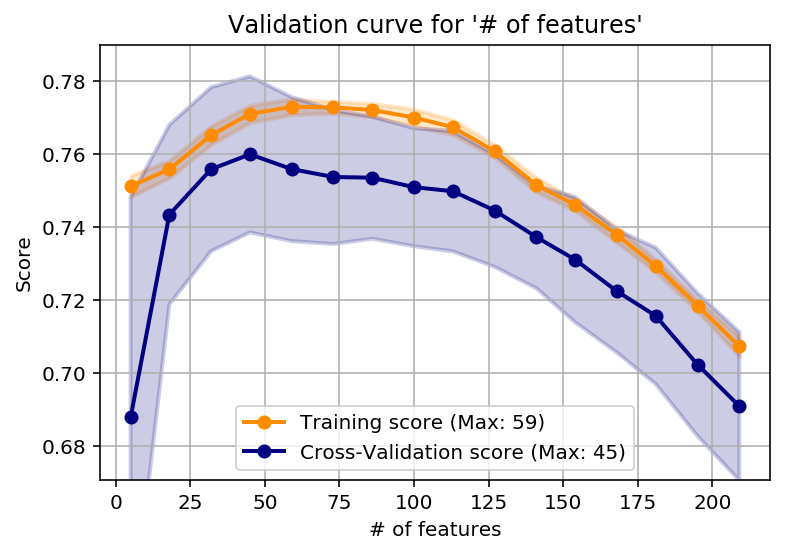

In [29]:
train_scores = pd.DataFrame(train_scores)
test_scores = pd.DataFrame(test_scores)

train_scores.name = 'Training score'
test_scores.name = 'Cross-Validation score'

plot_validation_curve(param_range, train_scores, test_scores)

##### Hidden neurons

In [30]:
param_range = pd.Series(np.geomspace(64, 8192, num=16, dtype=int), name='# of hidden neurons')

train_scores, test_scores = validation_curve(
    models['elm'], 
    X, 
    y, 
    param_name='rl__n_hidden', 
    param_range=param_range,
    cv=cv, 
    scoring='r2'
)

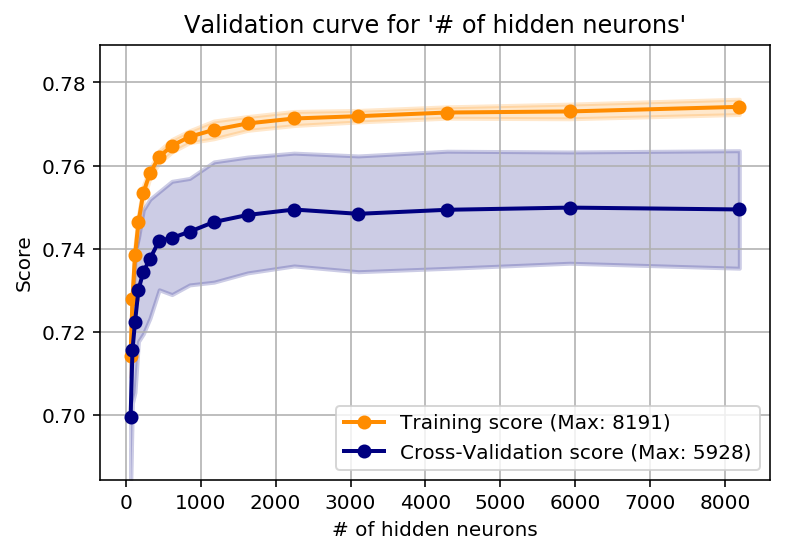

In [31]:
train_scores = pd.DataFrame(train_scores)
test_scores = pd.DataFrame(test_scores)

train_scores.name = 'Training score'
test_scores.name = 'Cross-Validation score'

plot_validation_curve(param_range, train_scores, test_scores)

#### SVM

##### Number of features

In [32]:
param_range = pd.Series(np.linspace(5, len(feature_scores), num=16, dtype=int), name='# of features')

train_scores, test_scores = validation_curve(
    models['svm'], 
    X, 
    y, 
    param_name='selector__k', 
    param_range=param_range,
    cv=cv, 
    scoring='r2'
)

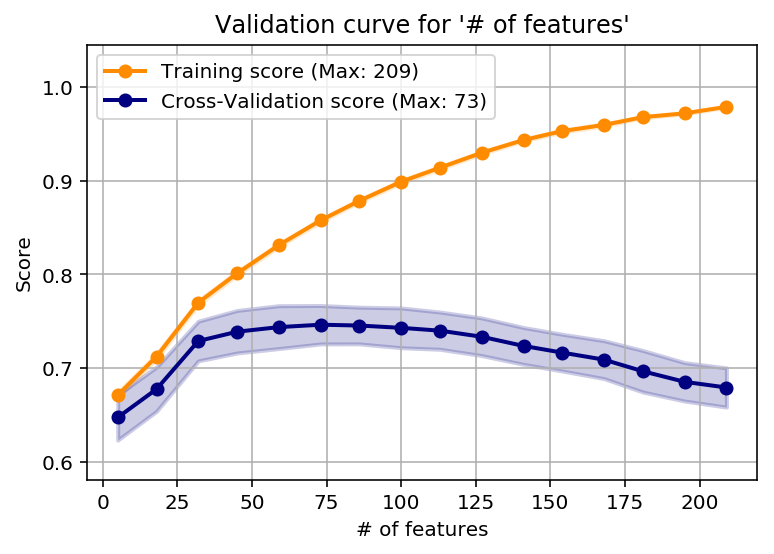

In [33]:
train_scores = pd.DataFrame(train_scores)
test_scores = pd.DataFrame(test_scores)

train_scores.name = 'Training score'
test_scores.name = 'Cross-Validation score'

plot_validation_curve(param_range, train_scores, test_scores)

##### C

In [34]:
param_range = pd.Series(np.geomspace(1e-4, 100, num=16), name='# of features')

train_scores, test_scores = validation_curve(
    models['svm'], 
    X, 
    y, 
    param_name='svm__C', 
    param_range=param_range,
    cv=cv, 
    scoring='r2'
)

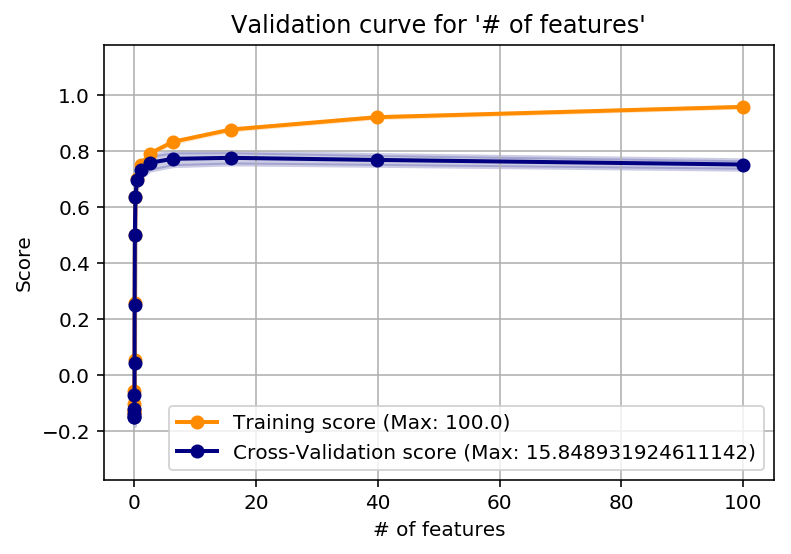

In [35]:
train_scores = pd.DataFrame(train_scores)
test_scores = pd.DataFrame(test_scores)

train_scores.name = 'Training score'
test_scores.name = 'Cross-Validation score'

plot_validation_curve(param_range, train_scores, test_scores)

### Learning curve

In [36]:
from sklearn.model_selection import learning_curve

#### ELM

In [37]:
train_sizes, train_scores, test_scores = learning_curve(
    models['elm'], 
    X, 
    y, 
    train_sizes=np.linspace(.1, 1.0, num=16),
    cv=cv,
    scoring='r2',
    shuffle=True
)

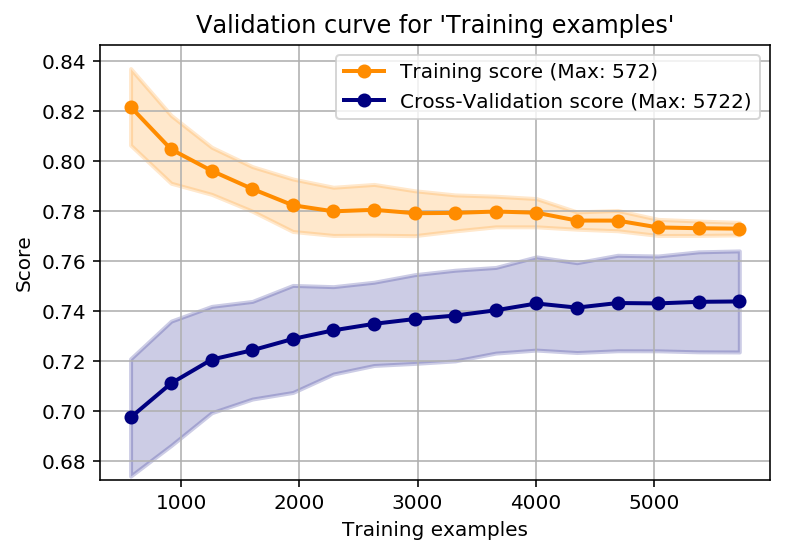

In [38]:
train_sizes = pd.Series(train_sizes, name='Training examples')
train_scores = pd.DataFrame(train_scores)
test_scores = pd.DataFrame(test_scores)

train_scores.name = 'Training score'
test_scores.name = 'Cross-Validation score'

plot_validation_curve(train_sizes, train_scores, test_scores)

#### SVM

In [39]:
train_sizes, train_scores, test_scores = learning_curve(
    models['svm'], 
    X, 
    y, 
    train_sizes=np.linspace(.1, 1.0, num=16),
    cv=cv,
    scoring='r2',
    shuffle=True
)

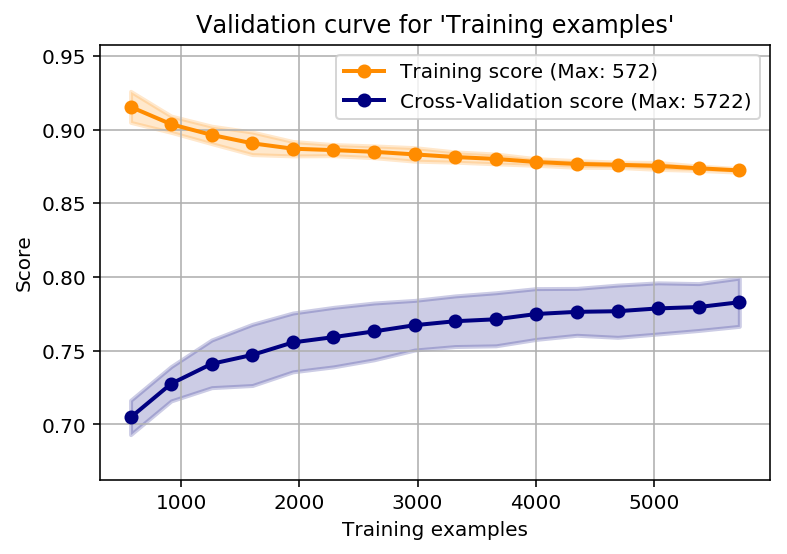

In [40]:
train_sizes = pd.Series(train_sizes, name='Training examples')
train_scores = pd.DataFrame(train_scores)
test_scores = pd.DataFrame(test_scores)

train_scores.name = 'Training score'
test_scores.name = 'Cross-Validation score'

plot_validation_curve(train_sizes, train_scores, test_scores)

## Validations

In [41]:
from sklearn.base import clone

### ELM

In [42]:
model = clone(models['elm'])
model.fit(X_train, y_train)

y_pred = pd.Series(model.predict(X_test), index=y_test.index, name='{} prediction'.format(y_test.name))

get_scores([
    pd.Series([y_train, model.predict(X_train)], name='Training'),
    pd.Series([y_test, y_pred], name='Testing'),
])

,EV,R2,RMSE
Training,0.764261,0.764261,5.020123
Testing,0.768665,0.767073,5.087835


#### Histogram compare

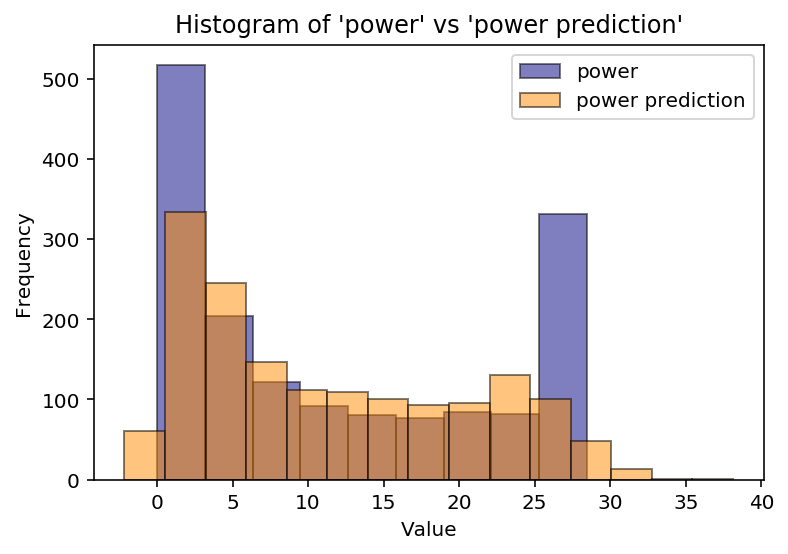

In [43]:
plot_histogram_compare(y_test, y_pred)

#### Scatter compare

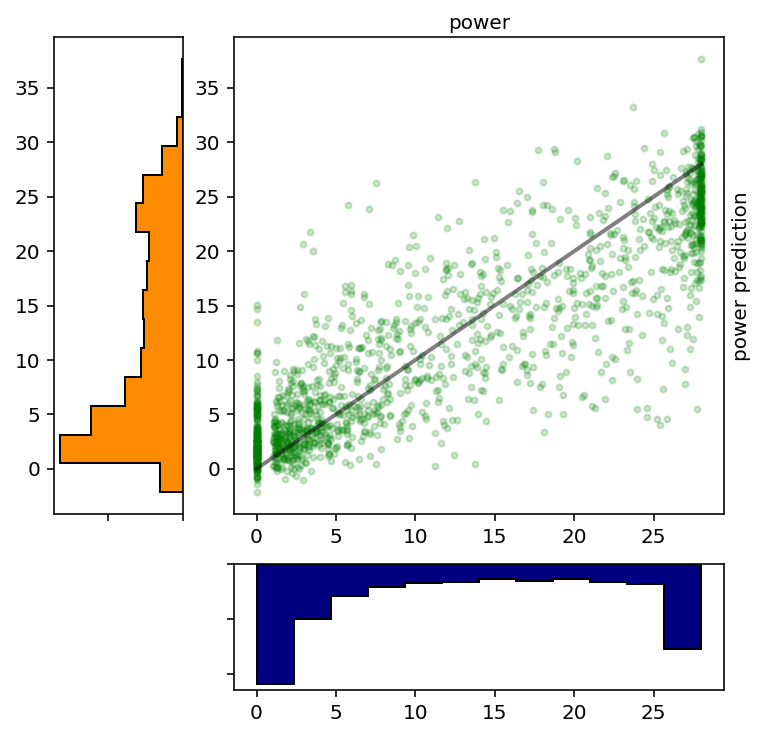

In [44]:
plot_scatter_histogram(y_test, y_pred)

#### Accuracy histogram

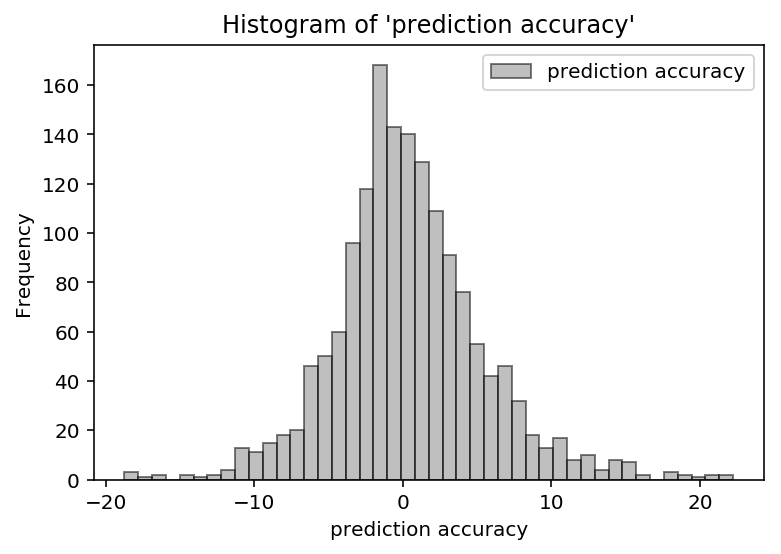

In [45]:
y_accuracy = pd.Series(y_test - y_pred, name='prediction accuracy')

plot_histogram(y_accuracy)

### SVM

In [46]:
model = clone(models['svm'])
model.fit(X_train, y_train)

y_pred = pd.Series(model.predict(X_test), index=y_test.index, name='{} prediction'.format(y_test.name))

get_scores([
    pd.Series([y_train, model.predict(X_train)], name='Training'),
    pd.Series([y_test, y_pred], name='Testing'),
])

,EV,R2,RMSE
Training,0.871384,0.871329,3.708850
Testing,0.773850,0.772947,5.023264


#### Histogram compare

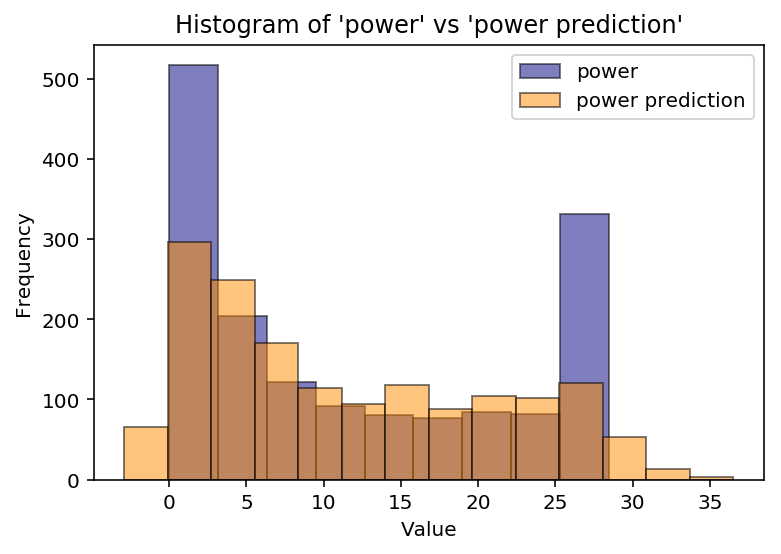

In [47]:
plot_histogram_compare(y_test, y_pred)

#### Scatter compare

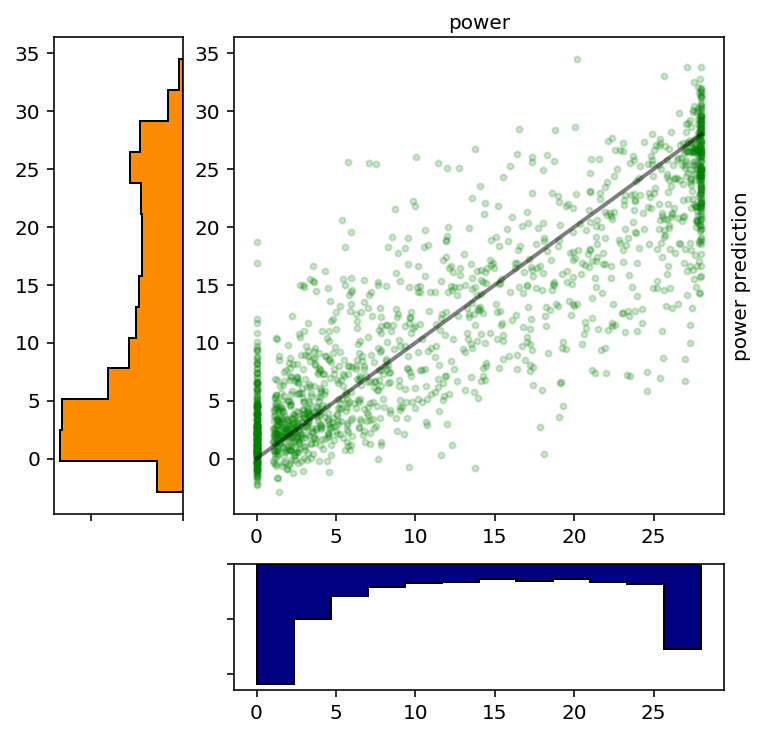

In [48]:
plot_scatter_histogram(y_test, y_pred)

#### Accuracy histogram

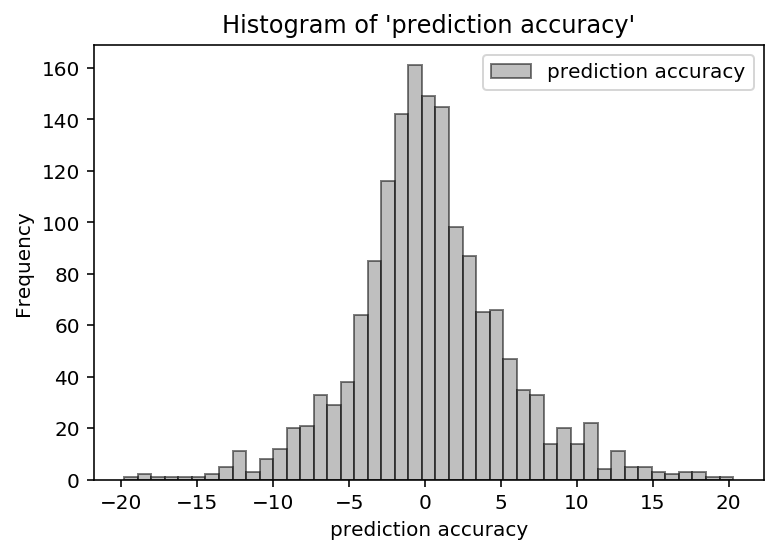

In [49]:
y_accuracy = pd.Series(y_test - y_pred, name='prediction accuracy')

plot_histogram(y_accuracy)